Uruchomienie SNN (LIF) na syntetycznych danych w oparciu o NORSE

In [5]:
import torch
import torch.nn as nn
import norse.torch as norse
import matplotlib.pyplot as plt
import numpy as np

In [6]:
time_steps = 100 
batch_size = 1 
input_size = 1
input_data = torch.rand(time_steps, batch_size, input_size)*2

lif = norse.LIFCell()
state = None

for t in range(time_steps):
    out, state = lif(input_data[t], state)
    print(f"Timestep {t}, Output: {out.item()}")

Timestep 0, Output: 0.0
Timestep 1, Output: 0.0
Timestep 2, Output: 0.0
Timestep 3, Output: 0.0
Timestep 4, Output: 0.0
Timestep 5, Output: 0.0
Timestep 6, Output: 0.0
Timestep 7, Output: 1.0
Timestep 8, Output: 0.0
Timestep 9, Output: 0.0
Timestep 10, Output: 0.0
Timestep 11, Output: 1.0
Timestep 12, Output: 0.0
Timestep 13, Output: 0.0
Timestep 14, Output: 1.0
Timestep 15, Output: 0.0
Timestep 16, Output: 1.0
Timestep 17, Output: 0.0
Timestep 18, Output: 1.0
Timestep 19, Output: 0.0
Timestep 20, Output: 1.0
Timestep 21, Output: 0.0
Timestep 22, Output: 0.0
Timestep 23, Output: 1.0
Timestep 24, Output: 0.0
Timestep 25, Output: 1.0
Timestep 26, Output: 0.0
Timestep 27, Output: 0.0
Timestep 28, Output: 1.0
Timestep 29, Output: 0.0
Timestep 30, Output: 1.0
Timestep 31, Output: 0.0
Timestep 32, Output: 0.0
Timestep 33, Output: 1.0
Timestep 34, Output: 0.0
Timestep 35, Output: 0.0
Timestep 36, Output: 1.0
Timestep 37, Output: 0.0
Timestep 38, Output: 0.0
Timestep 39, Output: 1.0
Timestep 4

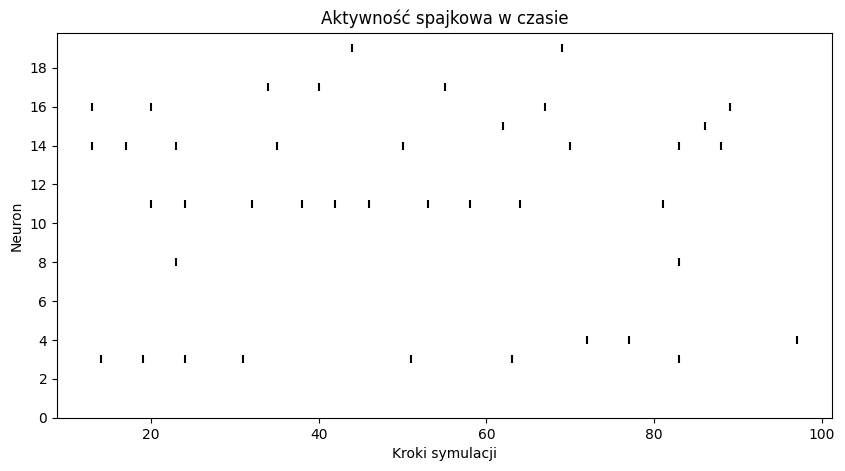

In [8]:
class SNN(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.fc = nn.Linear(input_size, hidden_size)
        self.lif = norse.LIFCell()

    def forward(self, x, state):
        x = self.fc(x)
        spiked, state = self.lif(x, state)
        return spiked, state

input_size=10
hidden_size=20
time_steps=100

model = SNN(input_size, hidden_size)
state = None

input_data = torch.randn(time_steps, input_size) #generowanie danych wejściowych

outputs = []
for t in range(time_steps):
    spiked, state = model(input_data[t], state)
    outputs.append(spiked)

outputs = torch.stack(outputs).detach().numpy()
plt.figure(figsize=(10, 5))
for neuron_id in range(hidden_size):
    spike_times = np.where(outputs[:, neuron_id] > 0)[0]
    plt.scatter(spike_times, [neuron_id] * len(spike_times), marker='|', color='black')

plt.yticks(np.arange(0, hidden_size, 2))
plt.xlabel("Kroki symulacji")
plt.ylabel("Neuron")
plt.title("Aktywność spajkowa w czasie")
plt.show()

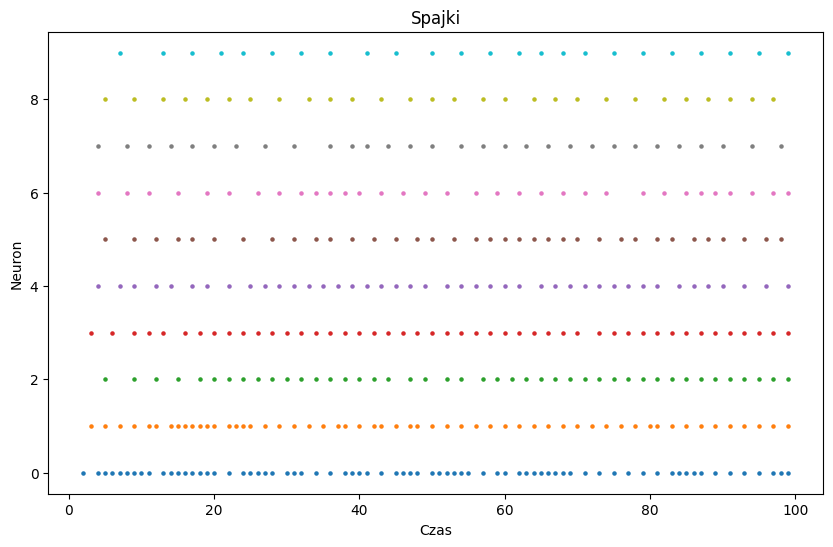

In [9]:
timesteps2 = 100 
batch_size = 1  
input_size = 10  
hidden_size = 10 

input_data = torch.rand(timesteps2, batch_size, input_size)*2 
neurons = [norse.LIFCell(norse.LIFParameters(v_th=torch.tensor(0.5 + 0.1 * i))) for i in range(hidden_size)]
states = [None]*hidden_size
spike_trains = torch.zeros(timesteps2, hidden_size)

for t in range(timesteps2):
    for i, neuron in enumerate(neurons):  
        out, states[i] = neuron(input_data[t, :, i].unsqueeze(0), states[i])
        spike_trains[t, i] = out.item()

plt.figure(figsize=(10, 6))
for neuron_idx in range(hidden_size):
    spike_times = (spike_trains[:, neuron_idx] > 0).nonzero(as_tuple=True)[0]
    plt.scatter(spike_times, [neuron_idx] * len(spike_times), s=5, label=f"Neuron {neuron_idx}" if neuron_idx < 1 else "")

plt.xlabel("Czas")
plt.ylabel("Neuron")
plt.title("Spajki")
plt.show()